In [41]:
# Importing Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import xgboost as xgb

In [42]:
# Loading and Cleaning the Dataset
df = pd.read_csv('Lung_Cancer_Dataset.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [44]:
df = df.drop(['Patient Id', 'index'], axis=1)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [45]:
# Encoding the target variable
label_encoder = LabelEncoder()
df['Level_encoded'] = label_encoder.fit_transform(df['Level'])
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Level_encoded
0,33,1,2,4,5,4,3,2,2,4,...,4,2,2,3,1,2,3,4,Low,1
1,17,1,3,1,5,3,4,2,2,2,...,3,7,8,6,2,1,7,2,Medium,2
2,35,1,4,5,6,5,5,4,6,7,...,7,9,2,1,4,6,7,2,High,0
3,37,1,7,7,7,7,6,7,7,7,...,2,3,1,4,5,6,7,5,High,0
4,46,1,6,8,7,7,7,6,7,7,...,2,4,1,4,2,4,2,3,High,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,3,2,7,8,2,4,5,3,High,0
996,37,2,6,8,7,7,7,6,7,7,...,6,5,7,2,4,3,1,4,High,0
997,25,2,4,5,6,5,5,4,6,7,...,7,9,2,1,4,6,7,2,High,0
998,18,2,6,8,7,7,7,6,7,7,...,2,4,1,4,2,4,2,3,High,0


In [46]:
X = df.drop(['Level', 'Level_encoded'], axis=1)
y = df['Level_encoded']

In [47]:
# Feature Selection using Recursive Feature Elimination
estimator = xgb.XGBClassifier(eval_metric='logloss')
selector = RFE(estimator, n_features_to_select=5)  
X_selected = selector.fit_transform(X, y)
select_features = X.columns[selector.support_]
print(select_features)

Index(['Alcohol use', 'Smoking', 'Coughing of Blood', 'Fatigue', 'Wheezing'], dtype='object')


In [48]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.5, random_state=42)

In [49]:
# Training the XGBoost Classifier
model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
# Model Evaluation
cm = confusion_matrix(y_test, y_pred)
print(f'\nConfusion Matrix:\n{cm}')


Confusion Matrix:
[[188   0   0]
 [  0 156   0]
 [  0   0 156]]


In [51]:
print(f'\nClassification Report:\n{classification_report(y_test, y_pred)}')


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       156
           2       1.00      1.00      1.00       156

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [52]:
y_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
print(f'ROC-AUC Score: {roc_auc:.4f}')

ROC-AUC Score: 1.0000


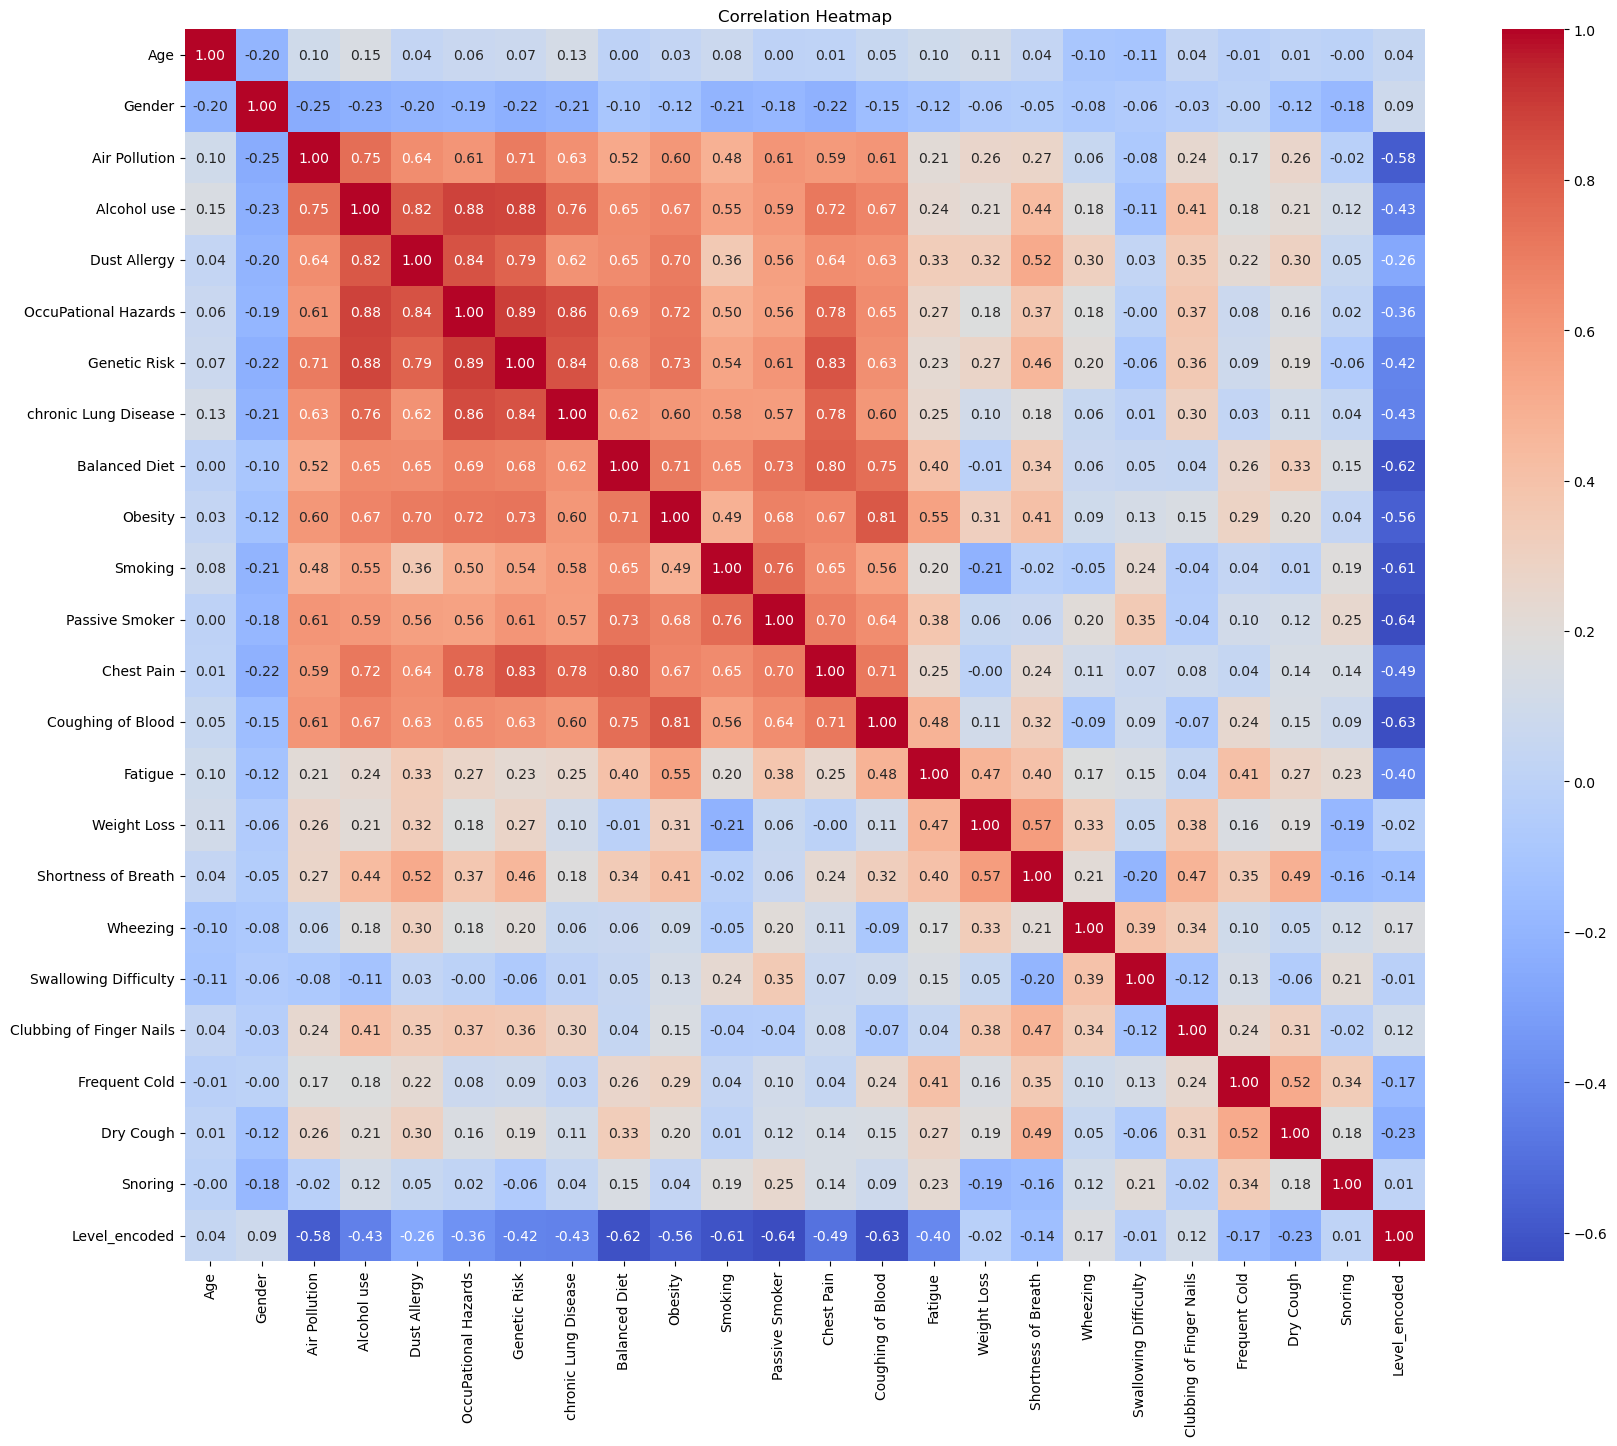

<Figure size 640x480 with 0 Axes>

In [53]:
# Visualizing Data Correlation
plt.figure(figsize=(20, 16))
sns.heatmap(df.drop('Level',axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')

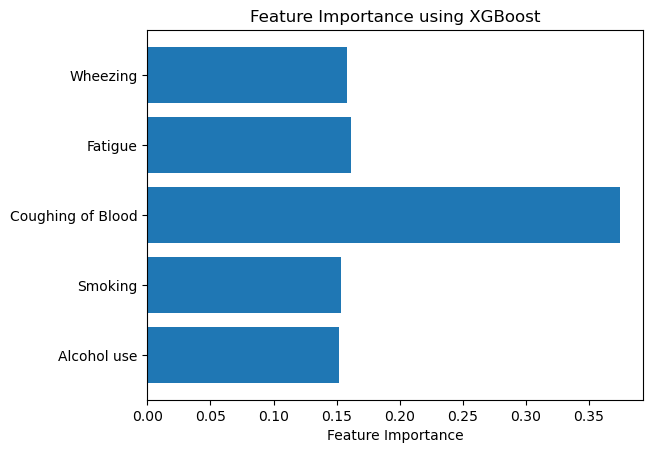

In [54]:
# Visualizing Feature importance
feature_importance = model.feature_importances_
plt.barh(X.columns[selector.support_], feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance using XGBoost')
plt.show()